In [1]:
# pip install of necessary packages 
import importlib.util

def install_and_import(package):
    spec = importlib.util.find_spec(package)
    if spec is None:
        print(f"Installing {package}...")
        !pip install {package}
    else:
        print(f"{package} is already installed.")

# List of packages to check/install
packages = ["time", "matplotlib", "numpy"]

for package in packages:
    install_and_import(package)


import time
import matplotlib.pyplot as plt
import numpy as np

def current_milli_time():
    return round(time.time() * 1000)

time is already installed.
matplotlib is already installed.
numpy is already installed.


# La Récurssion

## Introduction
La récursion est une technique de programmation dans laquelle une fonction résout un problème en appelant une copie d'elle-même. Cela signifie que la fonction est divisée en problèmes plus petits jusqu'à ce que le problème soit assez petit pour être résolu.\
Elle est souvent utilisée pour résoudre des problèmes mathématiques et informatiques complexes. Par exemple pour résoudre des problèmes de tri, de recherche et de parcours d'arbres. C'est une technique puissante, mais elle peut être difficile à comprendre et à déboguer.\
Il est important de comprendre comment la récursion fonctionne et comment l'utiliser correctement.

En cas de mauvaise utilisation elle peut devenir même dangereuse, car elle peut entraîner un débordement de la pile d'appels (Stack Overflow).\
Cela se produit lorsque la fonction récursive appelle elle-même de manière infinie, sans jamais atteindre le cas de base. Cela peut entraîner un épuisement des ressources du système et un crash du programme.

Ou simplement moins bien optimisé que la boucle for ou while.

## Principe
La récursion est basée sur deux concepts clés : le cas de base et le cas récursif.

1. Le cas de base est le cas le plus simple du problème. C'est le cas où la fonction récursive s'arrête et renvoie une valeur. Le cas de base est essentiel pour éviter une récursion infinie.
2. Le cas récursif est le cas où la fonction récursive appelle une copie d'elle-même pour résoudre un problème plus petit. La fonction récursive continue d'appeler des copies "de plus en plus simple" jusqu'à ce que le cas de base soit atteint.

![recursion](https://github.com/WillHCode/HEH-Help/blob/main/assets/recursion.png) \
Si l'image ne s'affiche pas, voici le lien : https://github.com/WillHCode/HEH-Help/blob/main/assets/recursion.png

On part d'une fonction de base {ici foo(n)} qui appelle une copie d'elle-même {foo(n-1)} et ainsi de suite, jusqu'à atteindre le cas de base {ici j'ai mis foo(0) en imaginant qu'il correspond à notre cas de base}.
L'idée est donc la suivante

1. On appelle foo(n) -> Il a besoin du résultat de foo(n-1) => Cas récursif
2. On appelle foo(n-1) -> Il a besoin du résultat de foo(n-2) => Cas récursif
3. ...
4. On appelle foo(1) -> Il a besoin du résultat de foo(0) => Cas récursif
5. On appelle foo(0) -> On a le résultat => Cas de base

Donc on a une suite de fonctions qui s'appellent les unes les autres jusqu'à atteindre le cas de base. Mais attention, il faut que le cas de base soit atteint, sinon on aura une récursion infinie.
Maintenant que foo(0) est atteint, on remonte la pile d'appels pour obtenir le résultat final comme ceci :

1. foo(0) -> retourne une valeur k
2. foo(1) -> avait besoin de foo(0) -> foo(0) a retourné k -> donc foo(1) peut retourner une valeur
3. foo(2) -> avait besoin de foo(1) -> foo(1) a retourné une valeur -> donc foo(2) peut retourner une valeur
4. ...
5. foo(n) -> avait besoin de foo(n-1) -> foo(n-1) a retourné une valeur -> donc foo(n) peut retourner une valeur
6. foo(n) retourne une valeur

Et voilà, on a notre résultat final.

A savoir que le nombre d'appels récursifs est appelé la profondeur de la récursion (ou Stack Depth). Et si elle est trop grande, on peut avoir un Stack Overflow ou un crash du programme voir même un temps d'exécution beaucoup trop long.

## Exemple
### Factorielle

La factorielle d'un nombre entier n est le produit de tous les entiers positifs inférieurs ou égaux à n. La factorielle de n est notée n! et est définie comme suit :


$$n! = n * (n-1) * (n-2) * ... * 1$$

Tout d'abord, définissons les cas de base et récursif pour la fonction factorielle :

**Cas de base** : La factorielle de 0 est 1.

**Cas récursif** : La factorielle de n est $n * factorielle(n-1)$

Par exemple si on cherche $factorielle(3)$, on a :
$$
\begin{align*}
\text{factorielle}(3) & = 3 \times \text{factorielle}(2) \\
                      & = 3 \times 2 \times \text{factorielle}(1) \\
                      & = 3 \times 2 \times 1 \times \text{factorielle}(0) \quad \text{-> Cas de base} \\
                      & = 3 \times 2 \times 1 \times 1
\end{align*}
$$


In [2]:
def factorielle_recusive(n):
    if n == 0:
        return 1
    else:
        return n * factorielle_recusive(n-1)

In [3]:
tmp_ms1 = current_milli_time()
f = factorielle_recusive(10)
tmp_ms2 = current_milli_time() - tmp_ms1

print(tmp_ms2, "ms")
print(f)

0 ms
3628800


Voyons les complexité en temps et en espace de la récursion.

**Complexité en temps** : La complexité en temps de la récursion est O(n), où n est le nombre d'appels récursifs. Cela est dû au fait que la fonction récursive appelle une copie de lui-même n fois pour résoudre le problème.

**Complexité en espace** : La complexité en espace de la récursion est O(n), où n est la profondeur de la récursion. Cela est dû au fait que chaque appel récursif est ajouté à la pile d'appels.

Jusqu'à présent, nous avons vu comment la récursion fonctionne et comment l'utiliser pour résoudre des problèmes. Cependant, il est important de noter que la récursion n'est pas toujours la meilleure solution pour résoudre un problème. En fait, la récursion peut être moins efficace que les boucles for ou while dans certains cas. Il est donc important de choisir la bonne technique de programmation en fonction du problème à résoudre.

In [4]:
def factorielle(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

In [5]:
tmp_ms1 = current_milli_time()
f = factorielle(10)
tmp_ms2 = current_milli_time() - tmp_ms1

print(tmp_ms2, "ms")
print(f)

0 ms
3628800


Voyons les complexité en temps et en espace de la boucle for.

**Complexité en temps** : La complexité en temps de la boucle for est O(n), où n est le nombre d'itérations de la boucle. Cela est dû au fait que la boucle for s'exécute n fois pour résoudre le problème.

**Complexité en espace** : La complexité en espace de la boucle for est O(1), car elle ne nécessite pas de stocker les appels récursifs dans la pile d'appels.

## Dans quel cas utiliser la récursion ?

Avec l'exemple de la récusion de la factorielle, on peut voir que la récursion est plus simple et plus "élégante" (au sens mathématique) que la boucle for.
Ici on pourrait se dire que si ce n'est qu'une question d'élégance, ça n'en vaut pas la peine... La boucle for a été plus rapide et plus efficace en terme de mémoire.

Alors pourquoi ce résultat ?
Ici nous avons vu un cas simple, autrement dis on n'exploite pas vraiment la puissance de la récursion.

### Fibonacci

La suite de Fibonacci est une suite d'entiers dans laquelle chaque nombre est la somme des deux nombres précédents. La suite commence par 0 et 1, et chaque nombre suivant est la somme des deux nombres précédents. La suite de Fibonacci est définie comme suit :
$$
\begin{align*}
F(0) & = 1 \\
F(1) & = 1 \\
F(n) & = F(n-1) + F(n-2)
\end{align*}
$$

Définissons les cas de base et récursif pour la fonction de Fibonacci :

**Cas de base** : $$ F(0) = 0 ~~ et ~~ F(1) = 1$$

**Cas récursif** : $$ F(n) = F(n-1) + F(n-2)$$


In [6]:
def fibonacci_recusive(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fibonacci_recusive(n-1) + fibonacci_recusive(n-2)

In [7]:
tmp_ms1 = current_milli_time()
f = fibonacci_recusive(10)
tmp_ms2 = current_milli_time() - tmp_ms1

print(tmp_ms2, "ms")
print(f)

0 ms
89


Voyons les complexité en temps et en espace de la récursion.

**Complexité en temps** : La complexité en temps de la récursion est O(2^n), où n est le nombre d'appels récursifs. Cela est dû au fait que la fonction récursive appelle deux copies de lui-même à chaque appel.

**Complexité en espace** : La complexité en espace de la récursion est O(n), où n est la profondeur de la récursion. Cela est dû au fait que chaque appel récursif est ajouté à la pile d'appels.


In [8]:
def fibonacci(n):
    if n == 0 or n == 1:
        return 1
    else:
        a, b = 1, 1
        for i in range(2, n+1):
            a, b = b, a + b
        return b
    

In [9]:
tmp_ms1 = current_milli_time()
f = fibonacci(10)
tmp_ms2 = current_milli_time() - tmp_ms1

print(tmp_ms2, "ms")
print(f)

0 ms
89


Voyons les complexité en temps et en espace de la boucle for.

**Complexité en temps** : La complexité en temps de la boucle for est O(n), où n est le nombre d'itérations de la boucle. Cela est dû au fait que la boucle for s'exécute n fois pour résoudre le problème.

**Complexité en espace** : La complexité en espace de la boucle for est O(1), car elle ne nécessite pas de stocker les appels récursifs dans la pile d'appels.

Encore une fois, on remarque qu'en terme de temps et d'espace, la boucle for est plus efficace que la récursion... C'est fais exprès, je vous rassure.
L'idée est de montrer qu'il est également possible d'optimiser la récursion pour qu'elle soit plus efficace. C'est ce que l'on appelle la récursion terminale.\

#### Récursion Terminale
Le principe ici est de pouvoir contrôler la profondeur d'appel, ici ce n'est pas très parlant mais l'ajout de 2 variables (a & b) va déjà aider le processus récursif.\
Autrement la technique terminale peut servir de filet de sécurité en cas de profondeur très grande. Par exemple introduire une variable "Depth" qui décroit à chaque appel, si celle-ci atteint 0, alors on va retourner une "erreur" qui va annoncer que l'algorithme a déjà fais trop d'appel récursif au goût/estimation du développeur.

Concrètement, si on est à la recherche d'un algo capable de trouver un chemin reliant 2 points dans un graph en maximum 7 étapes, on utilisera la technique terminale avec une variable Depth initiée à 7 qui va servir à traquer la profondeur de la récursions et arrêter prématurément l'algorithme en cas d'échec.


In [10]:
def fibonacci_tail_recusive(n, a=1, b=1):
    if n == 0:
        return a
    else:
        return fibonacci_tail_recusive(n-1, b, a+b)

In [11]:
tmp_ms1 = current_milli_time()
f = fibonacci_tail_recusive(10)
tmp_ms2 = current_milli_time() - tmp_ms1

print(tmp_ms2, "ms")
print(f)


0 ms
89


Ici on a gardé les mêmes cas de base et récursif, mais on a ajouté deux paramètres à la fonction pour stocker les valeurs de F(n-1) et F(n-2). Ainsi, on évite d'avoir à stocker les appels récursifs dans la pile d'appels, ce qui rend la récursion plus efficace.
En effet, voici les complexités en temps et en espace de la récursion terminale.

**Complexité en temps** : La complexité en temps de la récursion terminale est O(n), où n est le nombre d'appels récursifs. Cela est dû au fait que la fonction récursive appelle une copie de lui-même n fois pour résoudre le problème.

**Complexité en espace** : La complexité en espace de la récursion terminale est O(1), car elle ne nécessite pas de stocker les appels récursifs dans la pile d'appels.


#### Mémoïsation

On parle aussi de tableau de mémoïsation pour stocker les valeurs déjà calculées et éviter de les recalculer. C'est une technique très utilisée pour optimiser les récursions en réduisant le nombre d'appels récursifs afin de diminuer les complexités en temps et en espace.

NOTE : la mémoïsation est une technique plus standardisée que la récursion terminale, dans le sens où ce principe s'applique de manière très générale, alors que la récursion terminale est plus spécifique à certains cas.
On parle d'ailleurs parfois du "Cas memoïque" (ou "Memoization Case") pour désigner les cas où la mémoïsation est applicable.

Voici un exemple de la suite de Fibonacci avec mémoïsation :

In [12]:
def fibonacci_memoization(n, memo={}):
    if n in memo:                           # Cas mémoïque
        return memo[n]
    if n == 0 or n == 1:                    # Cas de base
        return 1
    else:                                   # Cas récursif
        memo[n] = fibonacci_memoization(n-1, memo) + fibonacci_memoization(n-2, memo)
        return memo[n]

In [13]:
tmp_ms1 = current_milli_time()
f = fibonacci_memoization(10)
tmp_ms2 = current_milli_time() - tmp_ms1

print(tmp_ms2, "ms")
print(f)


0 ms
89


Ici on stocke les valeurs déjà calculées dans un dictionnaire (memo). Ainsi, si la valeur de F(n) a déjà été calculée, on la récupère directement dans le dictionnaire, ce qui évite de la recalculer.

Au besoin la table de mémoïsation peut être déclarée comme varibale globale, voir être retournée afin d'être partagé par plusieurs algorithme utilisant la même table


## Enfin un cas où la récursion est plus efficace que la boucle for ?
### Parcours de graphe

Le parcours de graphe est un problème classique en informatique qui consiste à visiter tous les nœuds d'un graphe de manière systématique. Ici le but va être de parcourir un graphe de manière récursive et itérative pour comparer les deux méthodes.
En théorie, la méthode récursive sera plus optimisée que la méthode itérative.

### Implémentation

Pour cet exemple, nous allons créer un graphe sous forme de dictionnaire, où chaque clé représente un nœud et chaque valeur représente les nœuds voisins. Nous allons ensuite implémenter deux fonctions pour parcourir le graphe de manière récursive et itérative.

Pour ce faire nous allons utiliser le graphe suivant :

```
A -- B -- D
|    |    |
C -- E -- F
```

Et pour le parcourir, on va partir du nœud A. En utilisant l'algorithme de parcours en profondeur (Depth First Search - DFS)

In [14]:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'E'],
    'D': ['B','F'],
    'E': ['C', 'B', 'F'],
    'F': ['D', 'E']
}

def dfs_recursive(graph, node, visited=None):
    if visited is None:
        visited = []
    if node not in visited:
        visited.append(node)
        if node in graph:  # Check if node has neighbors
            for neighbor in graph[node]:
                dfs_recursive(graph, neighbor, visited)
    return visited

def dfs_iterative(graph, start):
    visited = []
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.append(node)
            if node in graph:  # Check if node has neighbors
                stack.extend([neighbor for neighbor in graph[node] if neighbor not in visited])
    return visited

# Sans utiliser de générateur pour la version itérative on aurait pu écrire :
def dfs_long_iterative(graph, start):
    visited = []
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.append(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    stack.append(neighbor)
    return visited

In [15]:
# Parcours récursif
tmp_ms1 = current_milli_time()
r = dfs_recursive(graph, 'A')
tmp_ms2 = current_milli_time() - tmp_ms1

print(tmp_ms2, "ms")

# Parcours itératif
tmp_ms1 = current_milli_time()
i = dfs_iterative(graph, 'A')
tmp_ms2 = current_milli_time() - tmp_ms1

print(tmp_ms2, "ms")

print(r)
print(i)


0 ms
0 ms
['A', 'B', 'D', 'F', 'E', 'C']
['A', 'C', 'E', 'F', 'D', 'B']


NOTE : Le résultat est le même, mais l'ordre des nœuds visités peut varier en fonction de l'implémentation de l'algorithme. Ici la différence est que dans un cas on ajoute les voisins (récursif) et dans l'autre on retire un noeud (le dernier) du stack avant d'ajouter ses voisins (itératif).

Au niveau des complexités en temps et en espace, vu qu'on est dans un graphe, on ne peut pas vraiment parler de nombre d'appels récursifs, mais plutôt de nombre de nœuds visités.
Ici les 2 fonctions possèdent les mêmes complexités en temps et en espace.


**Complexité en temps** : La complexité en temps de la récursion est O(V+E), où V est le nombre de nœuds et E est le nombre d'arêtes du graphe. Cela est dû au fait que la fonction récursive visite chaque nœud et chaque arête du graphe.

**Complexité en espace** : La complexité en espace de la récursion est O(V), où V est le nombre de nœuds du graphe. Cela est dû au fait que la fonction récursive stocke les nœuds visités dans la pile d'appels.


In [16]:
bigger_graph = {}
for i in range(2000):
    bigger_graph[str(i)] = [str(j) for j in range(i+1, i+10)]

In [17]:
tmp_ms1 = current_milli_time()
r = dfs_recursive(bigger_graph, '0')
tmp_ms2 = current_milli_time() - tmp_ms1

print(tmp_ms2, "ms")

tmp_ms1 = current_milli_time()
i = dfs_iterative(bigger_graph, '0')
tmp_ms2 = current_milli_time() - tmp_ms1

print(tmp_ms2, "ms")


133 ms
129 ms


## Conclusion

Alors.... La récursion est-elle plus efficace que la boucle for ?

La réponse est : pas vraiment.

On a pu voir différent cas de figure où la récursion était moins efficace que la boucle for en terme de complexité pure (temps et espace), par contre avec la correcte implémentation, on a pu voir que la récursion peut être aussi efficace.
Mais pourquoi c'est si populaire alors ?

Eh bien c'est souvent un critère de lisibilité et de simplicité. L'interêt derrière la récursion est de pouvoir résoudre des problèmes de manière plus élégante et plus simple.
Les exemples les plus parlant sont les Fractales, les Arbres, les Graphes, les problèmes de tri, etc.

De bons exemples sont le Flocon de Koch, le Triangle de Sierpinski, le Tri des tours de Hanoï, Courbe du Dragon, etc.

Car leur procédé de création est basé sur des appels récursifs, le principe de la récursion est donc parfaitement adapté à ces problèmes.

### Exemples de fractales
#### Flocon de Koch

voir image : https://github.com/WillHCode/HEH-Help/blob/main/assets/Droite_Koch.png

Le flocon de Koch est une fractale qui ressemble à un flocon de neige. Il est créé en répétant un motif de base à chaque étape. On peut décrire les étapes de création du flocon de Koch comme suit (pour celui dit "classique"):

1. Dessiner une ligne droite.
2. Diviser la ligne droite en trois segments de même longueur.
3. Remplacer le segment du milieu par un triangle équilatéral.
4. Répéter les étapes 2 et 3 pour chaque segment.

1 ms


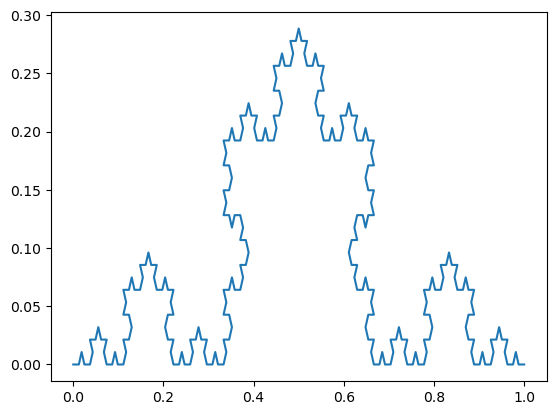

In [18]:
# Exemple du Flocon de Koch

def koch_snowflake(n):
    # Cas de base
    if n == 0:
        return [(0, 0), (1, 0)]
    else:
        points = koch_snowflake(n-1) # Appel récursif
        new_points = []
        for i in range(len(points)-1):
            x1, y1 = points[i]
            x2, y2 = points[i+1]
            new_points.append((x1, y1))
            new_points.append(((2*x1 + x2)/3, (2*y1 + y2)/3))
            new_points.append(((x1 + x2)/2 - (y2 - y1)*(3**0.5)/6, (x2 - x1)*(3**0.5)/6 + (y1 + y2)/2))
            new_points.append(((x1 + 2*x2)/3, (y1 + 2*y2)/3))
        new_points.append(points[-1])
        return new_points
    
tmp_ms1 = current_milli_time()
points = koch_snowflake(4)
tmp_ms2 = current_milli_time() - tmp_ms1

print(tmp_ms2, "ms")

x, y = zip(*points)
plt.plot(x, y)
plt.show()

Complexité en temps et en espace de la récursion.

**Complexité en temps** : La complexité en temps de la récursion est O(4^n), où n est le nombre d'appels récursifs. Cela est dû au fait que la fonction récursive appelle quatre copies de lui-même à chaque appel.

**Complexité en espace** : La complexité en espace de la récursion est O(4^n), où n est la profondeur de la récursion. Cela est dû au fait que chaque appel récursif est ajouté à la pile d'appels.

1 ms


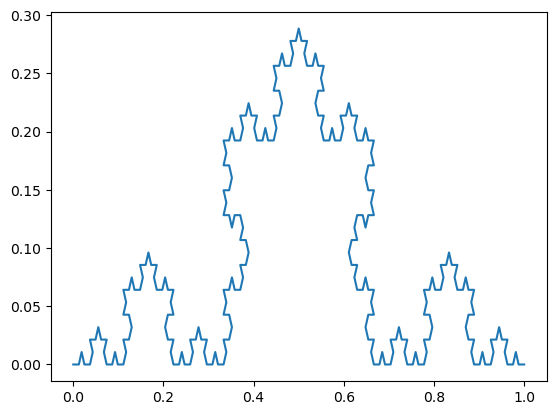

In [19]:
# Flocon de Koch avec une boucle for

def koch_snowflake(n):
    points = [(0, 0), (1, 0)]
    for _ in range(n):
        new_points = []
        for i in range(len(points)-1):
            x1, y1 = points[i]
            x2, y2 = points[i+1]
            new_points.append((x1, y1))
            new_points.append(((2*x1 + x2)/3, (2*y1 + y2)/3))
            new_points.append(((x1 + x2)/2 - (y2 - y1)*(3**0.5)/6, (x2 - x1)*(3**0.5)/6 + (y1 + y2)/2))
            new_points.append(((x1 + 2*x2)/3, (y1 + 2*y2)/3))
        new_points.append(points[-1])
        points = new_points
    return points

tmp_ms1 = current_milli_time()
points = koch_snowflake(4)
tmp_ms2 = current_milli_time() - tmp_ms1

print(tmp_ms2, "ms")

x, y = zip(*points)
plt.plot(x, y)
plt.show()


Complexité en temps et en espace de la boucle for.

**Complexité en temps** : La complexité en temps de la boucle for est O(4^n), où n est le nombre d'itérations de la boucle. Cela est dû au fait que les 4 points sont calculés à chaque itération et ceci n fois.

**Complexité en espace** :  La complexité en temps de la boucle for est O(4^n), où n est le nombre d'itérations de la boucle. Cela est dû au fait que les 4 points sont stockés à chaque itération et ceci n fois.

Mais encore une fois la récursion n'est pas la seule solution, même pour les fractales, on peut également utiliser des boucles for pour résoudre ces problèmes.

#### Fougère de Barnsley

La fougère de Barnsley est une fractale qui ressemble à une fougère. Elle est créée en répétant un motif de base à chaque étape. On peut décrire les étapes de création de la fougère de Barnsley comme suit :

1. Définir quatre transformations linéaires.
2. Choisir aléatoirement une transformation linéaire à chaque étape.
3. Appliquer la transformation linéaire au point précédent.
4. Répéter les étapes 2 et 3 pour chaque étape.
5. Dessiner le point obtenu à chaque étape.

Ici, nous allons utiliser les transformations linéaires suivantes pour créer la fougère de Barnsley :

$$x' = 0, y' = 0.16*y$$
$$x' = 0.85*x + 0.04*y, y' = -0.04*x + 0.85*y + 1.6$$
$$x' = 0.2*x - 0.26*y, y' = 0.23*x + 0.22*y + 1.6$$
$$x' = -0.15*x + 0.28*y, y' = 0.26*x + 0.24*y + 0.44$$

69 ms


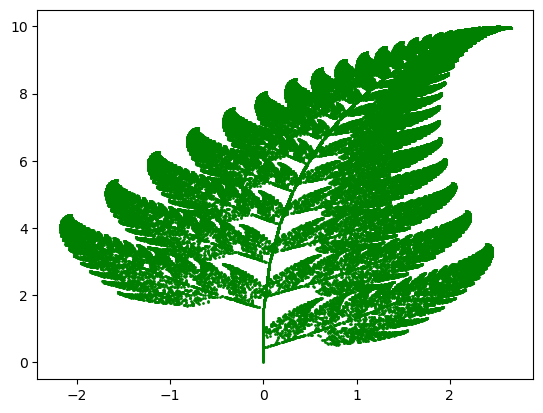

In [20]:
# Exemple de la Fougère de Barnsley, n = 100_000

def barnsley_fern(n):
    x, y = 0, 0
    points = [(x, y)]
    for _ in range(n):
        r = np.random.rand()
        if r < 0.01:
            x, y = 0, 0.16*y
        elif r < 0.86:
            x, y = 0.85*x + 0.04*y, -0.04*x + 0.85*y + 1.6
        elif r < 0.93:
            x, y = 0.2*x - 0.26*y, 0.23*x + 0.22*y + 1.6
        else:
            x, y = -0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44
        points.append((x, y))
    return points

tmp_ms1 = current_milli_time()
points = barnsley_fern(100_000)
tmp_ms2 = current_milli_time() - tmp_ms1

print(tmp_ms2, "ms")

x, y = zip(*points)
plt.scatter(x, y, s=1, c='green')
plt.show()

Complexité en temps et en espace de la boucle for.

**Complexité en temps** : La complexité en temps de la boucle for est O(n), où n est le nombre d'itérations de la boucle. Cela est dû au fait que la boucle for s'exécute n fois pour résoudre le problème.

**Complexité en espace** : La complexité en espace de la boucle for est O(n), où n est le nombre d'itérations de la boucle. Cela est dû au fait que les points sont stockés à chaque itération.

Je n'ai jamais trop tenté la fonction récursive pour la fougère de Barnsley, donc c'est un premier essai qui n'est potentiellement pas optimisé.

3 ms


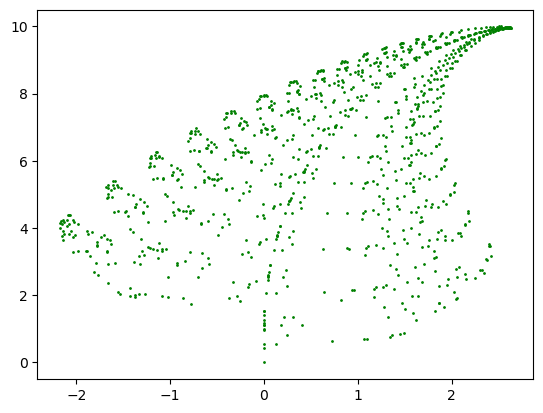

In [21]:
# Exemple de la Fougère de Barnsley récursif, n = 1_000

def barnsley_fern_recursive(n, x=0, y=0, points=None):
    if points is None:
        points = [(x, y)]

    if n == 0:
        return points
    else:
        r = np.random.rand()
        if r < 0.01:
            x, y = 0, 0.16*y
        elif r < 0.86:
            x, y = 0.85*x + 0.04*y, -0.04*x + 0.85*y + 1.6
        elif r < 0.93:
            x, y = 0.2*x - 0.26*y, 0.23*x + 0.22*y + 1.6
        else:
            x, y = -0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44
        points.append((x, y))
        return barnsley_fern_recursive(n-1, x, y, points)

tmp_ms1 = current_milli_time()
points = barnsley_fern_recursive(1_000)
tmp_ms2 = current_milli_time() - tmp_ms1

print(tmp_ms2, "ms")

x, y = zip(*points)
plt.scatter(x, y, s=1, c='green')
plt.show()

Complexité en temps et en espace de la récursion.

**Complexité en temps** : La complexité en temps de la récursion est O(n), où n est le nombre d'appels récursifs. Cela est dû au fait que la fonction récursive appelle une copie de lui-même n fois pour résoudre le problème.

**Complexité en espace** : La complexité en espace de la récursion est O(n), où n est la profondeur de la récursion. Cela est dû au fait que chaque appel récursif est ajouté à la pile d'appels.

NOTE :
Je n'ai utilisé que n = 1_000 pour la récursion, au delà ça devient très lent, voir même étrangement trop lent... Ma supposition est que la récursion va avoir du mal à gérer les appels récursifs et les appels aléatoires en même temps et en trop grand nombre.
Gérer autant d'appels récursifs à garder dans la pile d'appels doit être très lourd pour le système, ce qui fait que le procéder devient anormalement lent voir peut potentiellement crasher à long terme.